In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score

import matplotlib as plt
#import tensorflow as tf

In [5]:
# matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')


# Pandas and Numpy
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import psycopg2

In [6]:
#import connection string (youll need to create this)
from config import conn

# create the engine
engine = create_engine(conn)
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
us_data = Base.classes.us_data_df
#Historical_Price = Base.classes.historical_price_by_day

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
#create df from Recession_Indicator table
results = []

results = session.query(#us_data.intdate, \
                        us_data.recession_indicator, \
                        #us_data.country, \
                        #us_data.spy_open, \
                        #us_data.spy_high, \
                        #us_data.spy_low, \
                        #us_data.spy_close, \
                        #us_data.spx_open, \
                        #us_data.spx_high, \
                        #us_data.spx_low, \
                        #us_data.spx_close, \
                        us_data.dji_open, \
                        #us_data.dji_high, \
                        #us_data.dji_low, \
                        us_data.dji_close, \
                        us_data.cpi, \
                        us_data.gdp, \
                        us_data.inflation, \
                        us_data.unemployment)


data_df = pd.DataFrame(results)
data_df.head()

recession_indicator dji_open dji_close        cpi     gdp  inflation  \
0                True     None      None  15.990414  1051.2   5.838255   
1                True     None      None  15.990414  1051.2   5.838255   
2                True     None      None  15.990414  1051.2   5.838255   
3                True     None      None  15.990414  1051.2   5.838255   
4                True     None      None  15.990414  1051.2   5.838255   

   unemployment  
0      3.873711  
1      4.213119  
2      4.394145  
3      4.636633  
4      4.715396

In [9]:
# Import our input dataset
#data_df = pd.read_csv('us_data_df.csv')
# Fill in the empty rows with "0". (4.5.2)
#data_df.fillna(0)
#data_df = data_df.dropna()
data_df.head()

recession_indicator dji_open dji_close        cpi     gdp  inflation  \
0                True     None      None  15.990414  1051.2   5.838255   
1                True     None      None  15.990414  1051.2   5.838255   
2                True     None      None  15.990414  1051.2   5.838255   
3                True     None      None  15.990414  1051.2   5.838255   
4                True     None      None  15.990414  1051.2   5.838255   

   unemployment  
0      3.873711  
1      4.213119  
2      4.394145  
3      4.636633  
4      4.715396

In [10]:
# convert to float
data_df[['dji_open','dji_close']] = data_df[['dji_open','dji_close']].astype(float)

data_df = pd.get_dummies(data_df, columns=["recession_indicator"])
data_df["dji_diff"] = data_df["dji_close"]-data_df["dji_open"]
data_df = data_df.dropna()

data_df.head()

dji_open  dji_close        cpi       gdp  inflation  unemployment  \
368    830.57     830.57  16.834236  1135.156   4.292767      5.994841   
369    835.77     835.77  16.834236  1135.156   4.292767      5.997475   
370    837.97     837.97  16.834236  1135.156   4.292767      6.007436   
371    837.83     837.83  16.834236  1135.156   4.292767      6.121167   
372    837.01     837.01  16.834236  1135.156   4.292767      6.194005   

     recession_indicator_False  recession_indicator_True  dji_diff  
368                          1                         0       0.0  
369                          1                         0       0.0  
370                          1                         0       0.0  
371                          1                         0       0.0  
372                          1                         0       0.0

In [11]:
data_df = data_df.drop({"recession_indicator_False"}, axis=1)

data_df.dtypes

dji_open                    float64
dji_close                   float64
cpi                         float64
gdp                         float64
inflation                   float64
unemployment                float64
recession_indicator_True      uint8
dji_diff                    float64
dtype: object

## Data Insights

In [12]:
# EDA on Data Table, showing 370 observations and 9 characteristics
data_df.shape

(370, 8)

In [13]:
# EDA to see label of each column
data_df.columns.values 

array(['dji_open', 'dji_close', 'cpi', 'gdp', 'inflation', 'unemployment',
       'recession_indicator_True', 'dji_diff'], dtype=object)

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 368 to 17574
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dji_open                  370 non-null    float64
 1   dji_close                 370 non-null    float64
 2   cpi                       370 non-null    float64
 3   gdp                       370 non-null    float64
 4   inflation                 370 non-null    float64
 5   unemployment              370 non-null    float64
 6   recession_indicator_True  370 non-null    uint8  
 7   dji_diff                  370 non-null    float64
dtypes: float64(7), uint8(1)
memory usage: 23.5 KB


- Data has only object values
- No variable column has null or missing values

## Summary Statistics

In [15]:
# EDA on Historical Price Table, beginning with basic statistics
data_df.describe()

dji_open     dji_close         cpi           gdp   inflation  \
count    370.000000    370.000000  370.000000    370.000000  370.000000   
mean    6720.674135   6721.423730   61.270794   8525.403754    4.060610   
std     6213.196548   6215.595714   26.932196   5698.787351    2.917280   
min      632.040000    632.040000   16.834236   1135.156000   -0.355546   
25%     1047.205000   1047.205000   40.197539   3324.079750    2.270095   
50%     3850.615000   3850.615000   62.611543   7318.970500    3.212435   
75%    10879.155000  10904.845000   84.086795  13603.933000    4.827003   
max    25638.390000  25803.190000  104.978124  20163.159000   13.549202   

       unemployment  recession_indicator_True    dji_diff  
count    370.000000                370.000000  370.000000  
mean       6.319187                  0.437838    0.749595  
std        1.591601                  0.496793   76.637322  
min        3.750499                  0.000000 -374.260000  
25%        5.128100                  0.000000    0.000000  
50%        5.975339                  0.000000    0.000000  
75%        7.381444                  1.000000    0.000000  
max       11.006776                  1.000000  315.900000

### Key Observations
- dataset comprises of 64,708 observations and 4 chracteriestics
- out of which x is dependent variable and the remaining x are independent variables
- Data needs to be redone.  Not capturing mean, Standard deviation etc

In [16]:
# EDA on Historical Price Table continued with pandas-profiling
pp.ProfileReport(data_df)

## EDA Data Visualizations


In [33]:
X = data_df.copy()
X = X.drop("recession_indicator_True", axis=1)

X.head()

dji_open  dji_close        cpi       gdp  inflation  unemployment  \
368    830.57     830.57  16.834236  1135.156   4.292767      5.994841   
369    835.77     835.77  16.834236  1135.156   4.292767      5.997475   
370    837.97     837.97  16.834236  1135.156   4.292767      6.007436   
371    837.83     837.83  16.834236  1135.156   4.292767      6.121167   
372    837.01     837.01  16.834236  1135.156   4.292767      6.194005   

     dji_diff  
368       0.0  
369       0.0  
370       0.0  
371       0.0  
372       0.0

In [34]:
y_cols = data_df["recession_indicator_True"] 

y = pd.DataFrame()

y["recession_indicator_True"] = y_cols
y.head()

recession_indicator_True
368                         0
369                         0
370                         0
371                         0
372                         0

In [35]:
y['recession_indicator_True'].value_counts()

0    208
1    162
Name: recession_indicator_True, dtype: int64

In [36]:
# Create X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cols, random_state=1)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs", max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")



 Logistic regression model accuracy: 0.667


In [38]:

from sklearn.metrics import confusion_matrix, classification_report

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

Predicted 0  Predicted 1
Actual 0           43           11
Actual 1           20           19

In [39]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.80      0.74        54
           1       0.63      0.49      0.55        39

    accuracy                           0.67        93
   macro avg       0.66      0.64      0.64        93
weighted avg       0.66      0.67      0.66        93



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:


# Create a random forest classifier. (17.8.3)
rf_model = RandomForestClassifier(n_estimators=128, random_state=78, max_depth=4) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [42]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

Predicted 0  Predicted 1
Actual 0           52            2
Actual 1            8           31

In [43]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0           52            2
Actual 1            8           31

Accuracy Score : 0.8924731182795699
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.94      0.79      0.86        39

    accuracy                           0.89        93
   macro avg       0.90      0.88      0.89        93
weighted avg       0.90      0.89      0.89        93



In [44]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.28473918446285296, 'inflation'),
 (0.16689655888430616, 'unemployment'),
 (0.1403880651110522, 'gdp'),
 (0.13432218218675074, 'dji_open'),
 (0.12540658089004503, 'dji_close'),
 (0.12194988036154764, 'cpi'),
 (0.026297548103445173, 'dji_diff')]

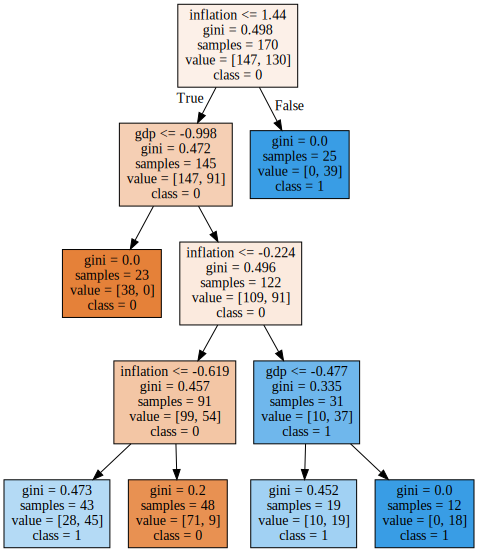

In [45]:
import graphviz
from sklearn import tree
#for tree_in_forest in rf_model.estimators_:
classification_tree = tree.export_graphviz(rf_model.estimators_[0], out_file=None, 
                      feature_names=X.columns,  
                      class_names=["0","1"],  
                      filled=True)
graph = graphviz.Source(classification_tree) 
graph

## Check for missing values

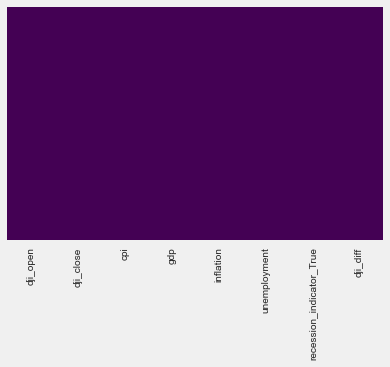

In [46]:
import seaborn as sns
sns.heatmap(data_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

## Checking Correlation

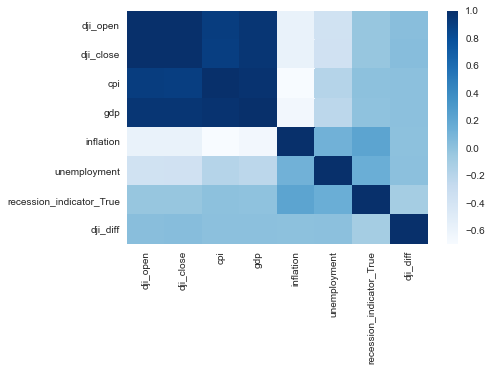

In [50]:
from matplotlib import figure
figure.Figure(figsize=(6,4))
sns.heatmap(data_df.corr(),cmap='Blues',annot=False)

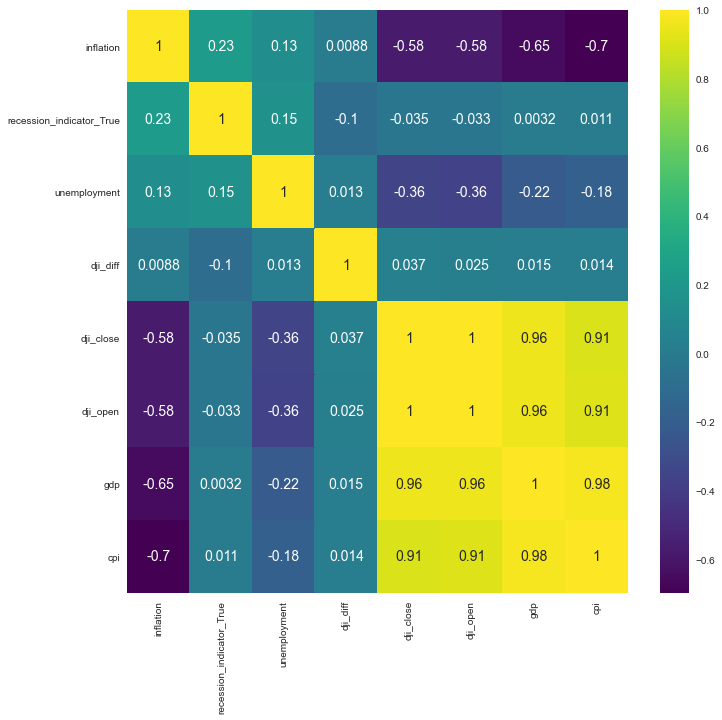

In [51]:
#Quality correlation matrix
k = 17# number of variables for heatmap
cols = data_df.corr().nlargest(k, 'inflation')['inflation'].index
cm = data_df[cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## Checking for outliers

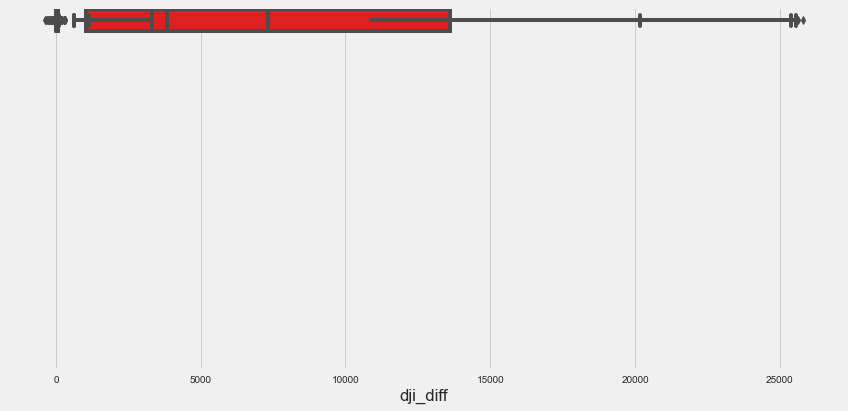

In [49]:
import matplotlib.pyplot as plt

l = data_df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,.75
                    *number_of_rows))
for i in range(0,len(l)):
    plt.plot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data_df[l[i]],color='red',orient='h')
    plt.tight_layout()

## Checking skewness

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data_df[l[i]],kde=True) 